In [80]:
import numpy as np
import tifffile as tiff
from matplotlib import pyplot as plt
from pathlib import Path

In [81]:
ut_path = Path(
    r"Q:\11_AIRBUS\03_LabXCT\Panel Pegaso\Probetas\1\27\registration_auxiliary_files\ut_centers_original.tif"
)
xct_path = Path(
    r"Q:\11_AIRBUS\03_LabXCT\Panel Pegaso\Probetas\1\27\registration_auxiliary_files\xct_centers_original.tif"
)

ut = tiff.imread(ut_path)
xct = tiff.imread(xct_path)

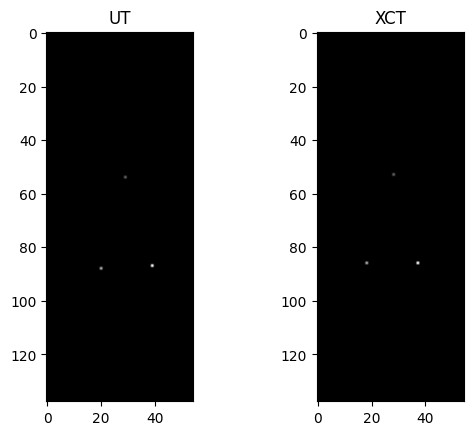

In [82]:
# Assuming ut and xct are already loaded as numpy arrays
# Step 1: Determine the size difference
height_diff = ut.shape[0] - xct.shape[0]
width_diff = ut.shape[1] - xct.shape[1]

# Step 2: Calculate padding sizes
top_pad = bottom_pad = height_diff // 2
left_pad = right_pad = width_diff // 2

# If the difference is odd, add the extra padding to the bottom/right
if height_diff % 2 != 0:
    bottom_pad += 1
if width_diff % 2 != 0:
    right_pad += 1

# Step 3: Pad the xct image
padded_xct = np.pad(
    xct,
    ((top_pad, bottom_pad), (left_pad, right_pad)),
    mode="constant",
    constant_values=0,
)

# Step 4: Display the images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(ut, cmap="gray")
ax[0].set_title("UT")
ax[1].imshow(padded_xct, cmap="gray")
ax[1].set_title("XCT")
plt.show()

In [86]:
points1 = np.array(
    [np.where(ut == 100), np.where(ut == 175), np.where(ut == 255)]
).reshape((3, 2))

points2 = np.array(
    [
        np.where(padded_xct == 100),
        np.where(padded_xct == 175),
        np.where(padded_xct == 255),
    ]
).reshape((3, 2))

print(points1)
print(points2)

[[54 29]
 [88 20]
 [87 39]]
[[53 28]
 [86 18]
 [86 37]]


In [87]:
import numpy as np


def calculate_centroid(points):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    centroid = (sum(x_coords) / len(points), sum(y_coords) / len(points))
    return centroid


def translate_points(points, translation):
    return [(p[0] + translation[0], p[1] + translation[1]) for p in points]


def calculate_rotation_angle(p1, p2):
    vector1 = (p1[0][0] - p1[1][0], p1[0][1] - p1[1][1])
    vector2 = (p2[0][0] - p2[1][0], p2[0][1] - p2[1][1])

    unit_vector1 = vector1 / np.linalg.norm(vector1)
    unit_vector2 = vector2 / np.linalg.norm(vector2)
    dot_product = np.dot(unit_vector1, unit_vector2)
    angle = np.arccos(dot_product)
    return np.degrees(angle)


def rotate_points(points, angle, pivot):
    angle_rad = np.radians(angle)
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    return [
        (
            (cos_angle * (p[0] - pivot[0]) - sin_angle * (p[1] - pivot[1]) + pivot[0]),
            (sin_angle * (p[0] - pivot[0]) + cos_angle * (p[1] - pivot[1]) + pivot[1]),
        )
        for p in points
    ]


# # Example usage
# points1 = [(1, 2), (3, 4), (5, 6)]
# points2 = [(2, 3), (4, 5), (6, 7)]

centroid1 = calculate_centroid(points1)
centroid2 = calculate_centroid(points2)

translation = (points1[0, 0] - points2[0, 0], points1[0, 1] - points2[0, 1])
translated_points2 = translate_points(points2, translation)

rotation_angle = calculate_rotation_angle(
    [points1[0], points1[1]], [translated_points2[0], translated_points2[1]]
)
rotated_translated_points2 = rotate_points(
    translated_points2, rotation_angle, translated_points2[0]
)

print("Translation:", translation)
print("Rotation Angle:", rotation_angle)
print("Transformed Points:", rotated_translated_points2)

Translation: (1, 1)
Rotation Angle: 2.031918797382692
Transformed Points: [(54.0, 29.0), (87.33381298496187, 20.176343621627794), (86.66014442490855, 39.16439698871089)]


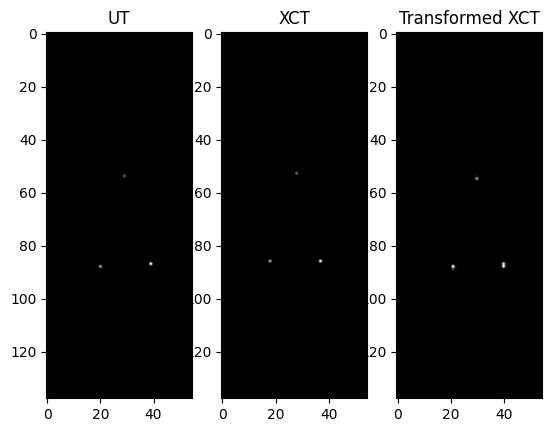

In [98]:
import cv2

# Load your image
image = padded_xct

# Assuming translation and rotation_angle are calculated as shown previously
translation = translation  # Replace tx, ty with your calculated values
rotation_angle = rotation_angle  # Replace calculated_angle with your calculated value
centroid = (
    float(translated_points2[0][0]),
    float(translated_points2[0][1]),
)  # Replace calculated_centroid with your calculated centroid after translation

# Create the translation matrix
translation_matrix = np.float32([[1, 0, translation[0]], [0, 1, translation[1]]])
# Apply the translation
translated_image = cv2.warpAffine(
    image, translation_matrix, (image.shape[1], image.shape[0])
)

# Create the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(centroid, rotation_angle, 1.0)
# Apply the rotation
transformed_image = cv2.warpAffine(
    translated_image, rotation_matrix, (image.shape[1], image.shape[0])
)

# Step 4: Display the images
fig, ax = plt.subplots(1, 3)
ax[0].imshow(ut, cmap="gray")
ax[0].set_title("UT")
ax[1].imshow(padded_xct, cmap="gray")
ax[1].set_title("XCT")
ax[2].imshow(transformed_image, cmap="gray")
ax[2].set_title("Transformed XCT")
plt.show()

In [99]:
# save the transformed image

tiff.imsave(
    r"Q:\11_AIRBUS\03_LabXCT\Panel Pegaso\Probetas\1\27\registration_auxiliary_files\transformed_image.tif",
    transformed_image,
)

C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_29576\1749279842.py:3: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(r'Q:\11_AIRBUS\03_LabXCT\Panel Pegaso\Probetas\1\27\registration_auxiliary_files\transformed_image.tif', transformed_image)
